In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calendar
from datetime import date, timedelta
# import package to ignore warning
import warnings
warnings.filterwarnings('ignore')


#CART
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
train = pd.read_csv('train.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)

In [3]:
train.head()

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,...,Closing_Date,Age,Area,Zip,Accept_Date,Month_Accept_Date,Week_in_month_Accept_Date,Listing_Date,Month_Listing_Date,Week_in_month_Listing_Date
0,17,769000,759000,CO,1257,2,2,Y,2.0,1999.0,...,2019-01-02,19.0,Santa Teresa,95138,2018-12-03,Dec,1,2018-12-16,Dec,3
1,0,750000,750000,TH,1444,2,2,Y,2.0,1979.0,...,2019-01-02,39.0,Berryessa,95131,2018-12-03,Dec,1,2019-01-02,Jan,1
2,7,750000,785000,TH,1655,3,2,Y,2.0,1982.0,...,2019-01-02,36.0,Santa Teresa,95139,2018-12-03,Dec,1,2018-12-26,Dec,4
3,15,674888,723000,SFH,1408,3,3,NaN,0.0,1953.0,...,2019-01-02,65.0,Alum Rock,95127,2018-12-03,Dec,1,2018-12-18,Dec,3
4,51,649000,636000,CO,922,2,2,NaN,0.0,1988.0,...,2019-01-02,30.0,Campbell,95128,2018-12-03,Dec,1,2018-11-12,Nov,2


In [4]:
test.head()

,DOM,LP,SP,BT,SqFt,BR,Bth,Gar,GarSp,YrBlt,...,Closing_Date,Age,Area,Zip,Accept_Date,Month_Accept_Date,Week_in_month_Accept_Date,Listing_Date,Month_Listing_Date,Week_in_month_Listing_Date
0,12,889500,905000,CO,1464,2,2,Y,2.0,2013.0,...,2020-12-22,7.0,Berryessa,95132,2020-11-22,Nov,4,2020-12-10,Dec,2
1,6,799999,935000,SFH,1398,4,2,Y,2.0,1971.0,...,2020-12-22,49.0,Evergreen,95148,2020-11-22,Nov,4,2020-12-16,Dec,3
2,11,799998,860000,SFH,1353,3,2,Y,2.0,1971.0,...,2020-12-23,49.0,Alum Rock,95127,2020-11-23,Nov,4,2020-12-12,Dec,2
3,25,549000,550000,CO,1094,2,2,NaN,0.0,1991.0,...,2020-12-23,29.0,South San Jose,95122,2020-11-23,Nov,4,2020-11-28,Nov,4
4,10,949000,985000,SFH,1065,3,2,Y,2.0,1971.0,...,2020-12-23,49.0,Blossom Valley,95123,2020-11-23,Nov,4,2020-12-13,Dec,2


In [6]:
# drop rows which include San Jose and SJOS - San Jose (train set do not contain)
test = test.drop(test[test['Area'] == 'San Jose'].index)
test = test.drop(test[test['Area'] == 'SJOS - San Jose'].index)
# drop rows in test sets with 'Freq_B', 'Freq_Q', 
test = test.drop(test[test['Freq'] == 'B'].index)
test = test.drop(test[test['Freq'] == 'Q'].index)

In [5]:
train = train.drop(columns = ['YrBlt','Closing_Date','Accept_Date','Listing_Date'])
test = test.drop(columns = ['YrBlt','Closing_Date','Accept_Date','Listing_Date'])
#get dummies
train = pd.get_dummies(train, columns = ['BT','Gar','Freq','Area','Zip','Month_Accept_Date','Month_Listing_Date'],drop_first = True)
test = pd.get_dummies(test, columns = ['BT','Gar','Freq','Area','Zip','Month_Accept_Date','Month_Listing_Date'],drop_first = True)

In [14]:
y_test = test['SP']
X_test = test.drop(['SP'], axis=1)
X_test['Month_Accept_Date_Oct'] = [0] * len(X_test)

# REGRESSION TREES

We are using CART model to predict the house value by tuning hyper-parameters with cross validation.

In [7]:
#Split X (independent variables) and y (dependent variable)
y_train = train['SP']
X_train = train.drop(['SP'], axis=1)
X_train.shape
# train.shape

(6616, 78)

In [8]:
#Exhaustive search over specified parameter values for an estimator.

grid_values = {'ccp_alpha': np.linspace(0.0, 10000000, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [100],
               'random_state': [88]} 
            
dtr = DecisionTreeRegressor()
dtr_cv_rmse = GridSearchCV(dtr, param_grid = grid_values, scoring =  'neg_root_mean_squared_error', cv=10, verbose=1) 

dtr_cv_rmse.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([       0.,    50000.,   100000.,   150000.,   200000.,   250000.,
         300000.,   350000.,   400000.,   450000.,   500000.,   550000.,
         600000.,   650000.,   700000.,   750000.,   800000.,   850000.,
         900000.,   950000.,  1000000.,  1050000.,  1100000.,  1150000.,
        1200000.,  1250000.,  1300000.,  1350000.,  1400000.,  1450000.,
        1500000.,  1550000.,  1600...
        8700000.,  8750000.,  8800000.,  8850000.,  8900000.,  8950000.,
        9000000.,  9050000.,  9100000.,  9150000.,  9200000.,  9250000.,
        9300000.,  9350000.,  9400000.,  9450000.,  9500000.,  9550000.,
        9600000.,  9650000.,  9700000.,  9750000.,  9800000.,  9850000.,
        9900000.,  9950000., 10000000.]),
                         'max_depth': [100], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='neg

In [9]:
rmse = (-1) *dtr_cv_rmse.cv_results_['mean_test_score'] 
ccp = dtr_cv_rmse.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation RMSE': rmse}).head(20)

,ccp alpha,Validation RMSE
0,0.0,40199.450581
1,50000.0,40200.019741
2,100000.0,40191.218032
3,150000.0,40163.946052
4,200000.0,40117.743337
5,250000.0,40022.543402
6,300000.0,39945.040080
7,350000.0,39901.685720
8,400000.0,39865.873947
9,450000.0,39773.040288


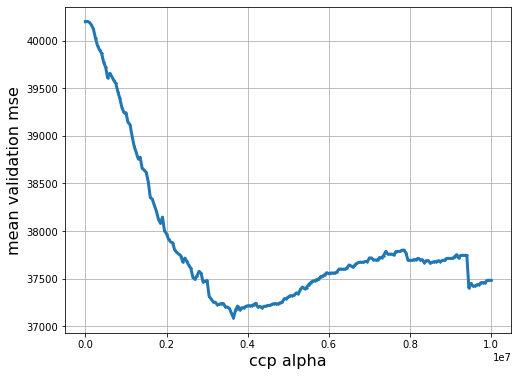

In [10]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation mse', fontsize=16)
plt.scatter(ccp, rmse, s=2)
plt.plot(ccp, rmse, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [18]:
print('Grid best parameter ccp_alpha (min RMSE): ', dtr_cv_rmse.best_params_['ccp_alpha'])
print('Grid best score (RMSE): ', dtr_cv_rmse.best_score_)

Grid best parameter ccp_alpha (min RMSE):  3650000.0
Grid best score (RMSE):  -37088.39114388564


Node count = 111


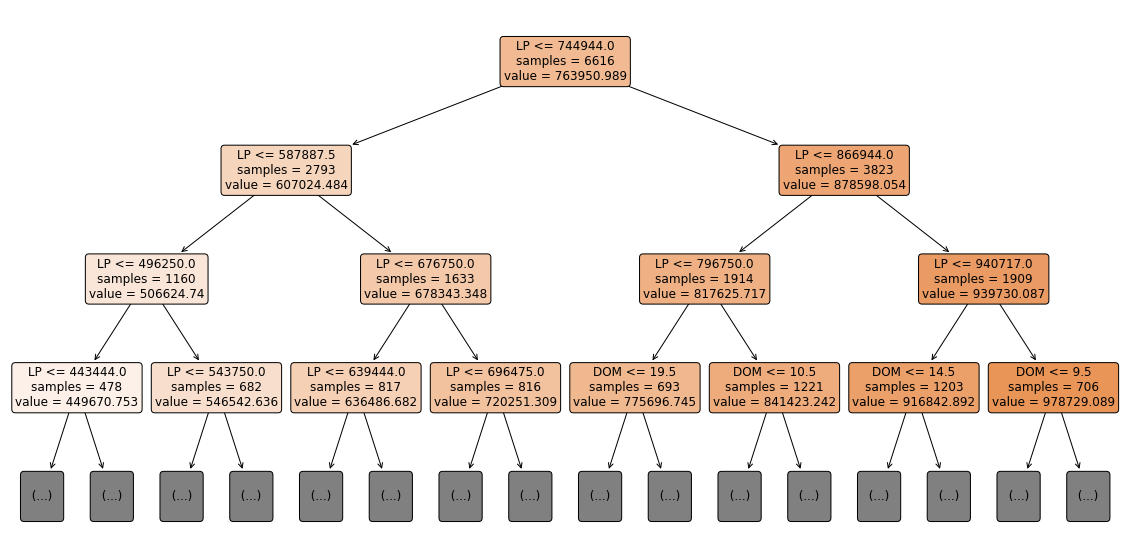

In [12]:
print('Node count =', dtr_cv_rmse.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtr_cv_rmse.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [13]:
# print the best parameter
print(dtr_cv_rmse.best_params_)

# print feature importance
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100 * dtr_cv_rmse.best_estimator_.feature_importances_}).round(2).head()

{'ccp_alpha': 3650000.0, 'max_depth': 100, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}


,Feature,Importance score
0,DOM,1.29
1,LP,98.36
2,SqFt,0.09
3,BR,0.02
4,Bth,0.00


In [15]:
# predict test set using best model we get
y_pred = dtr_cv_rmse.best_estimator_.predict(X_test)

In [16]:
# calculate OSR2, MSE, MAE
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

def MAE(y_test, y_pred):
    
    return (np.mean(abs(y_test - y_pred)))

def RMSE(y_test, y_pred):
    
    return np.sqrt(np.mean((y_test - y_pred)**2))

# calculate OSR2, RMSE, and MAE for random forest
print('OSR2', OSR2(y_train, y_test,y_pred))
print('RMSE', RMSE(y_test, y_pred))
print('MAE', MAE(y_test, y_pred))

OSR2 0.9115212394931445
RMSE 55225.80426938553
MAE 36973.381652089665


In [19]:
import pickle
filename = 'CART.sav'
pickle.dump(dtr_cv_rmse.best_estimator_,open(filename,'wb'))